<a href="https://colab.research.google.com/github/Joshuaogaga/Portfolios/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing dataset
data = pd.read_csv('/content/car-data1.csv')

In [3]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#Understanding Dataset

In [5]:
#Some preview
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
#Drop missing values
data = data.drop(['New_Price','Unnamed: 0'], axis = 1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
#Lets check for duplicate
data.duplicated().sum()

0

In [9]:
#Will be dealing with the missing values
#Its important we handle this TypeError: can only concatenate str (not "int") to str

In [10]:
#Seperate strings
data['Mileage'] = data['Mileage'].str.split(expand=True)[0].astype(float)
data['Engine'] = data['Engine'].str.split(expand=True)[0].astype(float)

In [11]:
#lets take a preview of our data
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [12]:
data['Power'].nunique

<bound method IndexOpsMixin.nunique of 0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object>

In [13]:
#For power variable, will have to address the null bhp values before considering
#seperating the strings
data['Power'] = data['Power'].replace('null bhp',None)
data['Power'] = data['Power'].str.split(expand=True)[0].astype(float)

In [14]:
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)
data['Engine'].fillna(data['Engine'].mean(), inplace=True)
data['Power'].fillna(data['Power'].mean(), inplace=True)
data['Seats'].fillna(data['Seats'].mean(), inplace=True)

In [15]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [16]:
data['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [17]:
data['Transmission'].value_counts()

Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64

In [18]:
data['Kilometers_Driven'].value_counts()

Kilometers_Driven
60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: count, Length: 3093, dtype: int64

In [19]:
#The Z-score method is commonly used for outlier detection because it
#provides a standardized way to identify extreme values in a dataset
#based on their deviation from the mean. Adjusting the threshold allows
#for flexibility in defining what constitutes an outlier based on the
#level of significance desired.

In [20]:
from scipy import stats
# Calculating Z-Score
z_scores = stats.zscore(data["Kilometers_Driven"])

# Identifying outliers using Z-Score
threshold = 2.5  # Usually 2.5 or 3 can be chosen
outliers = data['Kilometers_Driven'][abs(z_scores) > threshold]
outliers

340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Kilometers_Driven, dtype: int64

In [21]:
#Looking at our result, we have the highest value of km driven to be
#6,500,000 which does not make much sense when dealing with cars. It is
#obvious that this number is really extreme compared to other values.

#So therefore, it makes sense to remove some datas at a certain interval
#from the datasetdata.

#It would be logical to choose 420,000(Given benefit to buyers who dont
#have much knowledge of cars) as the limit.

In [22]:
data = data[data["Kilometers_Driven"] <= 420000]

In [23]:
data['Seats'].value_counts()

Seats
5.000000     5007
7.000000      674
8.000000      134
4.000000       99
5.278735       42
6.000000       31
2.000000       16
10.000000       5
9.000000        3
0.000000        1
Name: count, dtype: int64

In [24]:
#I think it will be wise to rmove the role with zero seat
data = data[data['Seats'] != 0]

In [25]:
#Lets editing some features

In [26]:
data.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
741,Maruti Ertiga VDI,Ahmedabad,2017,63939,Diesel,Manual,First,25.47,1248.0,88.5,7.0,7.75


In [27]:
#Lets work on the names
data['Company'] = data['Name'].str.split(expand=True)[0].str.lower()
data['Model'] = data['Name'].str.split().str[0:2].str.join(' ').str.lower()
data.drop(columns = ['Name'],inplace = True)

In [28]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti,maruti wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai,hyundai creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda,honda jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti,maruti ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi,audi a4


In [29]:
#Lets rearrange the columns
new_order = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission',
             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
data = data.reindex(columns=new_order)

In [30]:
data.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,maruti,maruti wagon,Mumbai,First,CNG,Manual,2010,72000,26.60,998.0,58.16,5.0,1.75
1,hyundai,hyundai creta,Pune,First,Diesel,Manual,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,honda,honda jazz,Chennai,First,Petrol,Manual,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,maruti,maruti ertiga,Chennai,First,Diesel,Manual,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,audi,audi a4,Coimbatore,Second,Diesel,Automatic,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [31]:
#EDA

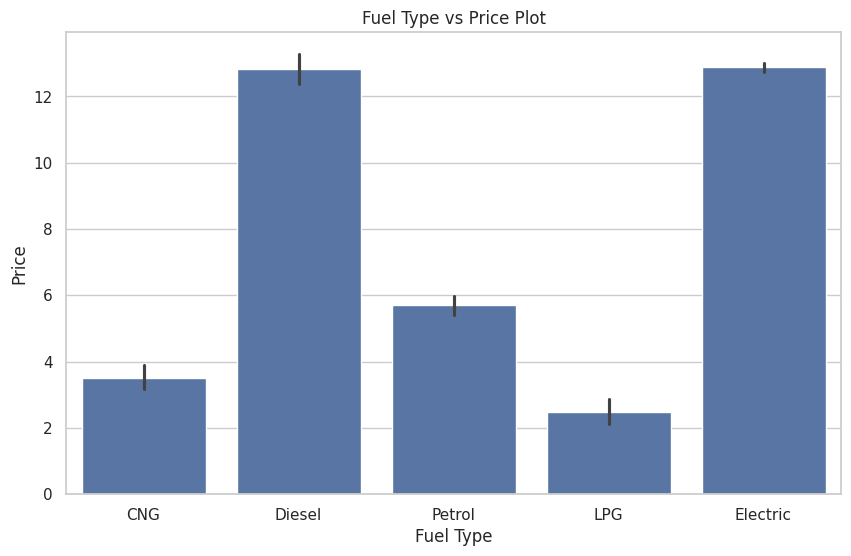

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Fuel_Type' and 'Price' columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting Fuel Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Price', data=data)
plt.title('Fuel Type vs Price Plot')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


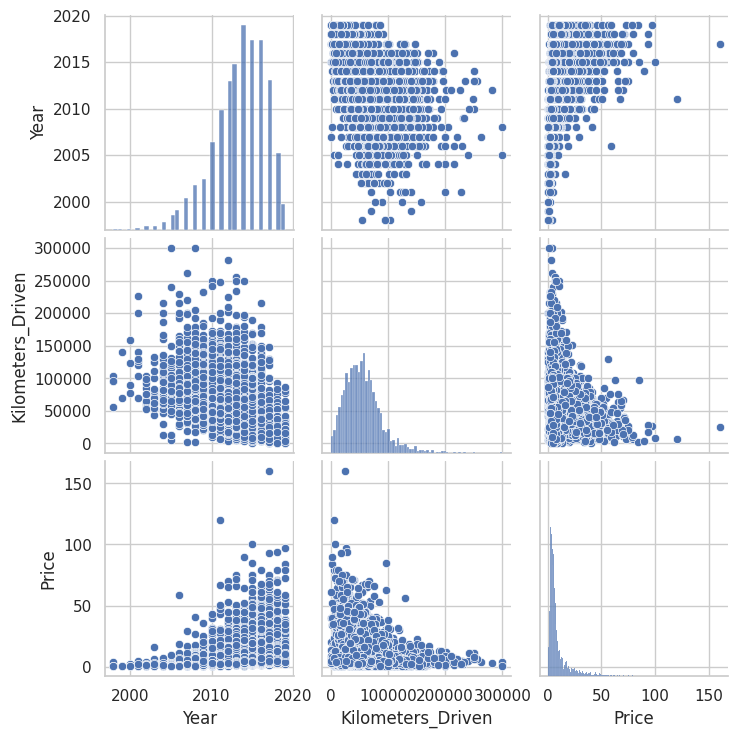

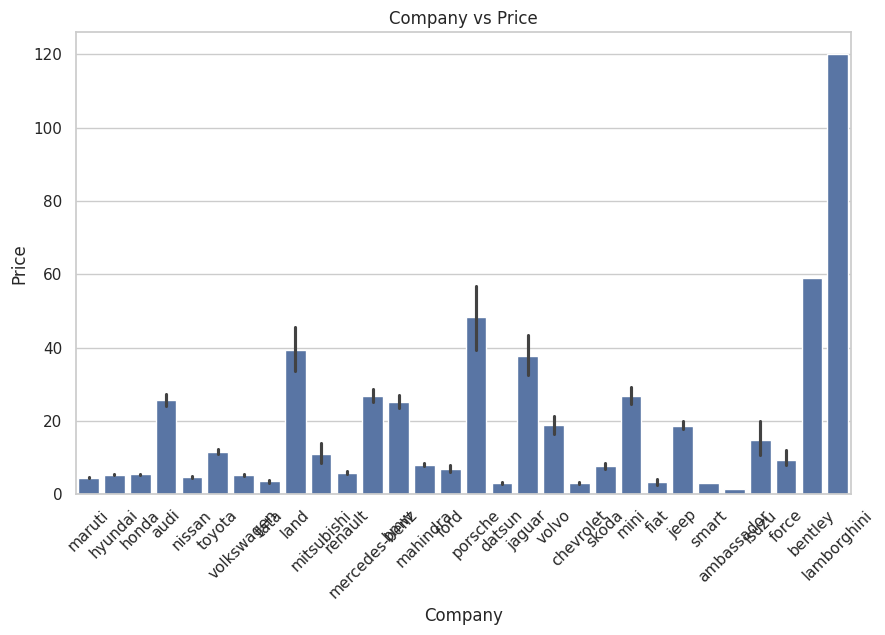

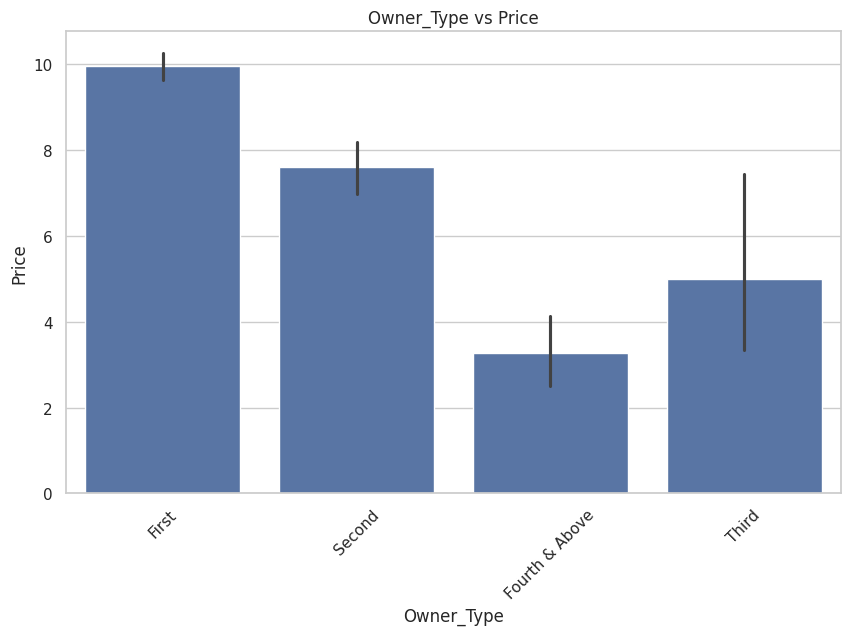

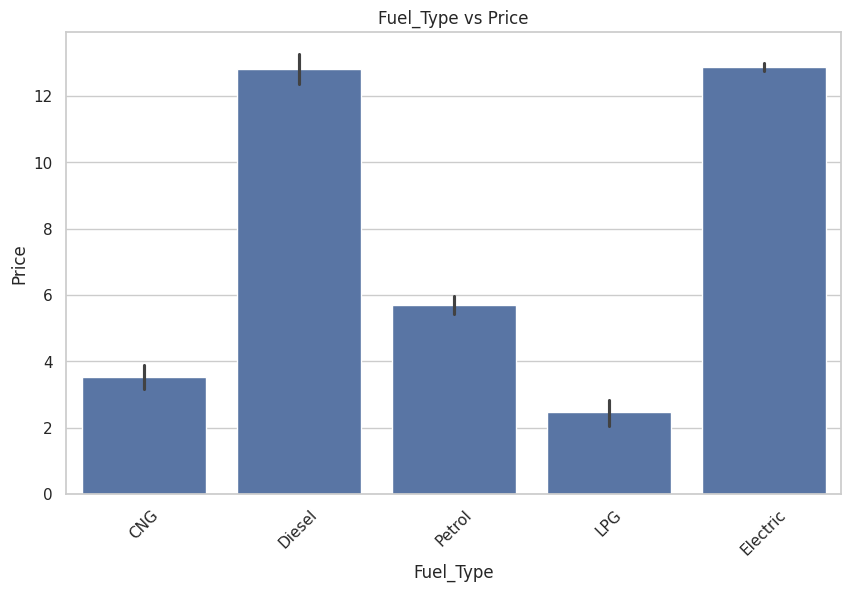

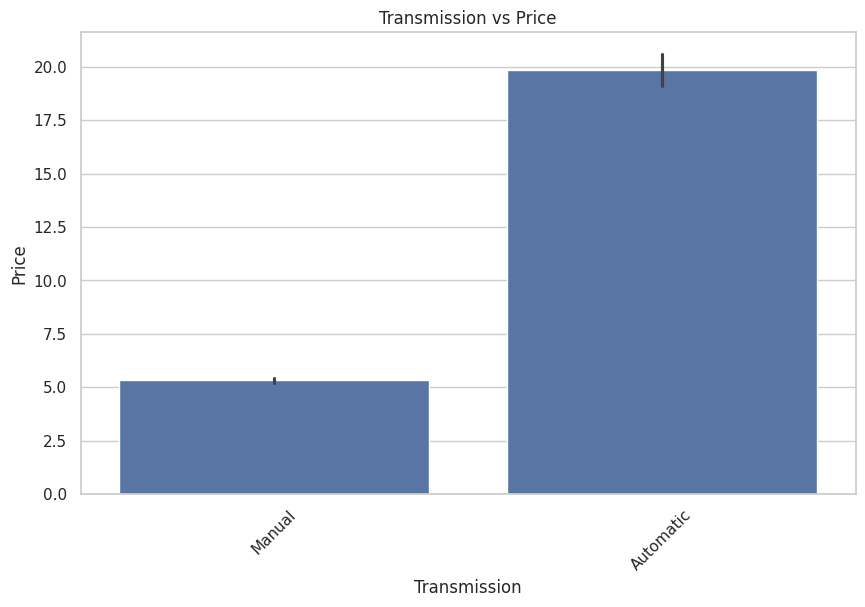

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical Features
numerical_features = ['Year', 'Kilometers_Driven','Price']

# Pairplot for numerical features
sns.pairplot(data[numerical_features])
plt.show()

# Categorical Features
categorical_features = ['Company', 'Owner_Type', 'Fuel_Type', 'Transmission']

# Boxplot for categorical features vs Price
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Price', data=data)
    plt.title(f'{feature} vs Price')
    plt.xticks(rotation=45)
    plt.show()


In [34]:
#seperate categorical data and numerical data
data_cat = data.select_dtypes(object)
data_cat.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission
0,maruti,maruti wagon,Mumbai,First,CNG,Manual
1,hyundai,hyundai creta,Pune,First,Diesel,Manual
2,honda,honda jazz,Chennai,First,Petrol,Manual
3,maruti,maruti ertiga,Chennai,First,Diesel,Manual
4,audi,audi a4,Coimbatore,Second,Diesel,Automatic


In [35]:
data_num = data.select_dtypes(['int64','float64'])
data_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74


(7.5, -0.5)

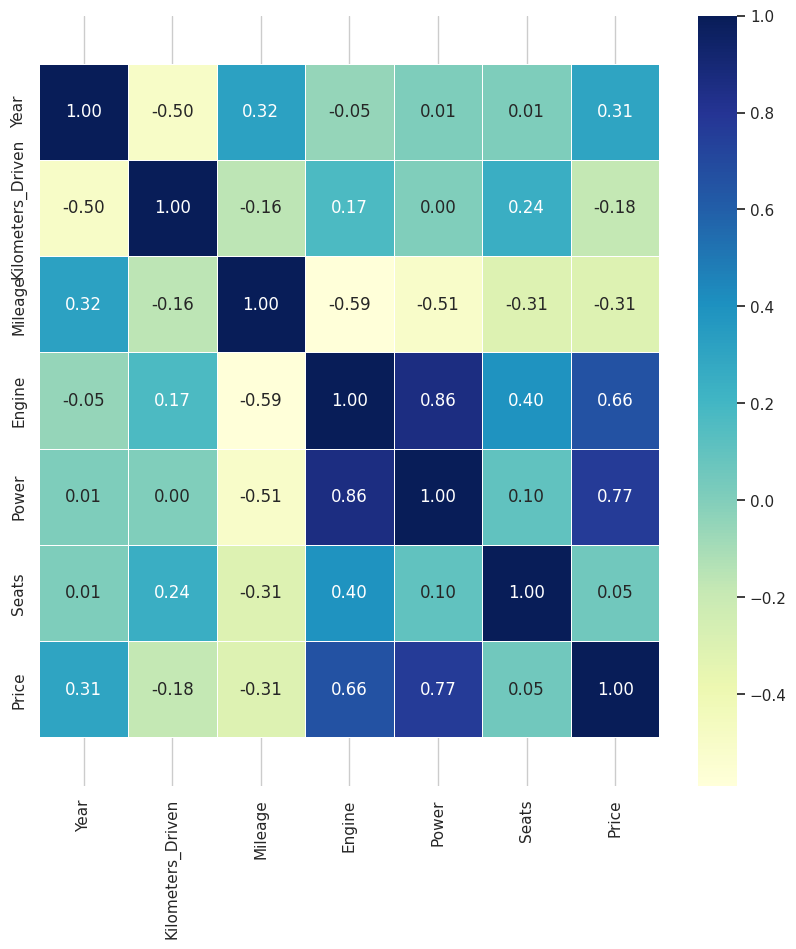

In [36]:
#Correlation matrix
corr_matrix = data_num.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [37]:
abs(data_num.corr()['Price'])

Year                 0.305076
Kilometers_Driven    0.184826
Mileage              0.306655
Engine               0.656930
Power                0.767188
Seats                0.053449
Price                1.000000
Name: Price, dtype: float64

In [38]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [39]:
for col in data_cat:
    le = LabelEncoder()
    data_cat[col] = le.fit_transform(data_cat[col])

In [40]:
data_cat.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission
0,17,125,9,0,0,1
1,10,64,10,0,1,1
2,9,59,2,0,4,1
3,17,112,2,0,1,1
4,1,2,3,2,1,0


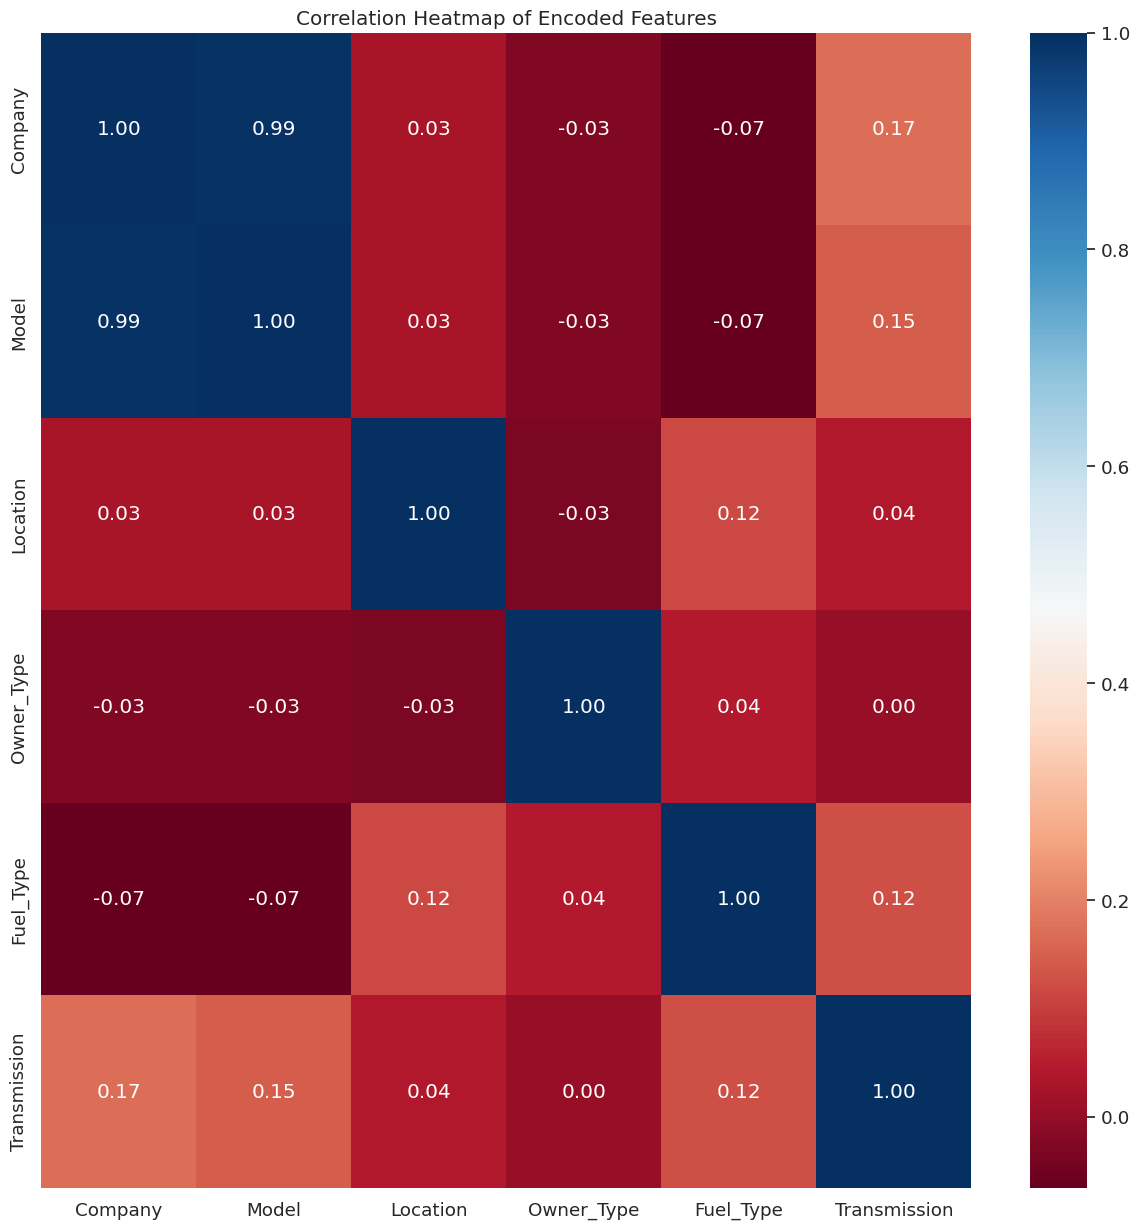

In [41]:
# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
sns.heatmap(data_cat.corr().T, fmt=".2f", annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

In [43]:
# Concatenating the two datasets
encode_data = pd.merge(data_cat, data_num, how="outer", left_index=True, right_index=True)
encode_data.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,17,125,9,0,0,1,2010,72000,26.60,998.0,58.16,5.0,1.75
1,10,64,10,0,1,1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,9,59,2,0,4,1,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,17,112,2,0,1,1,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,1,2,3,2,1,0,2013,40670,15.20,1968.0,140.80,5.0,17.74


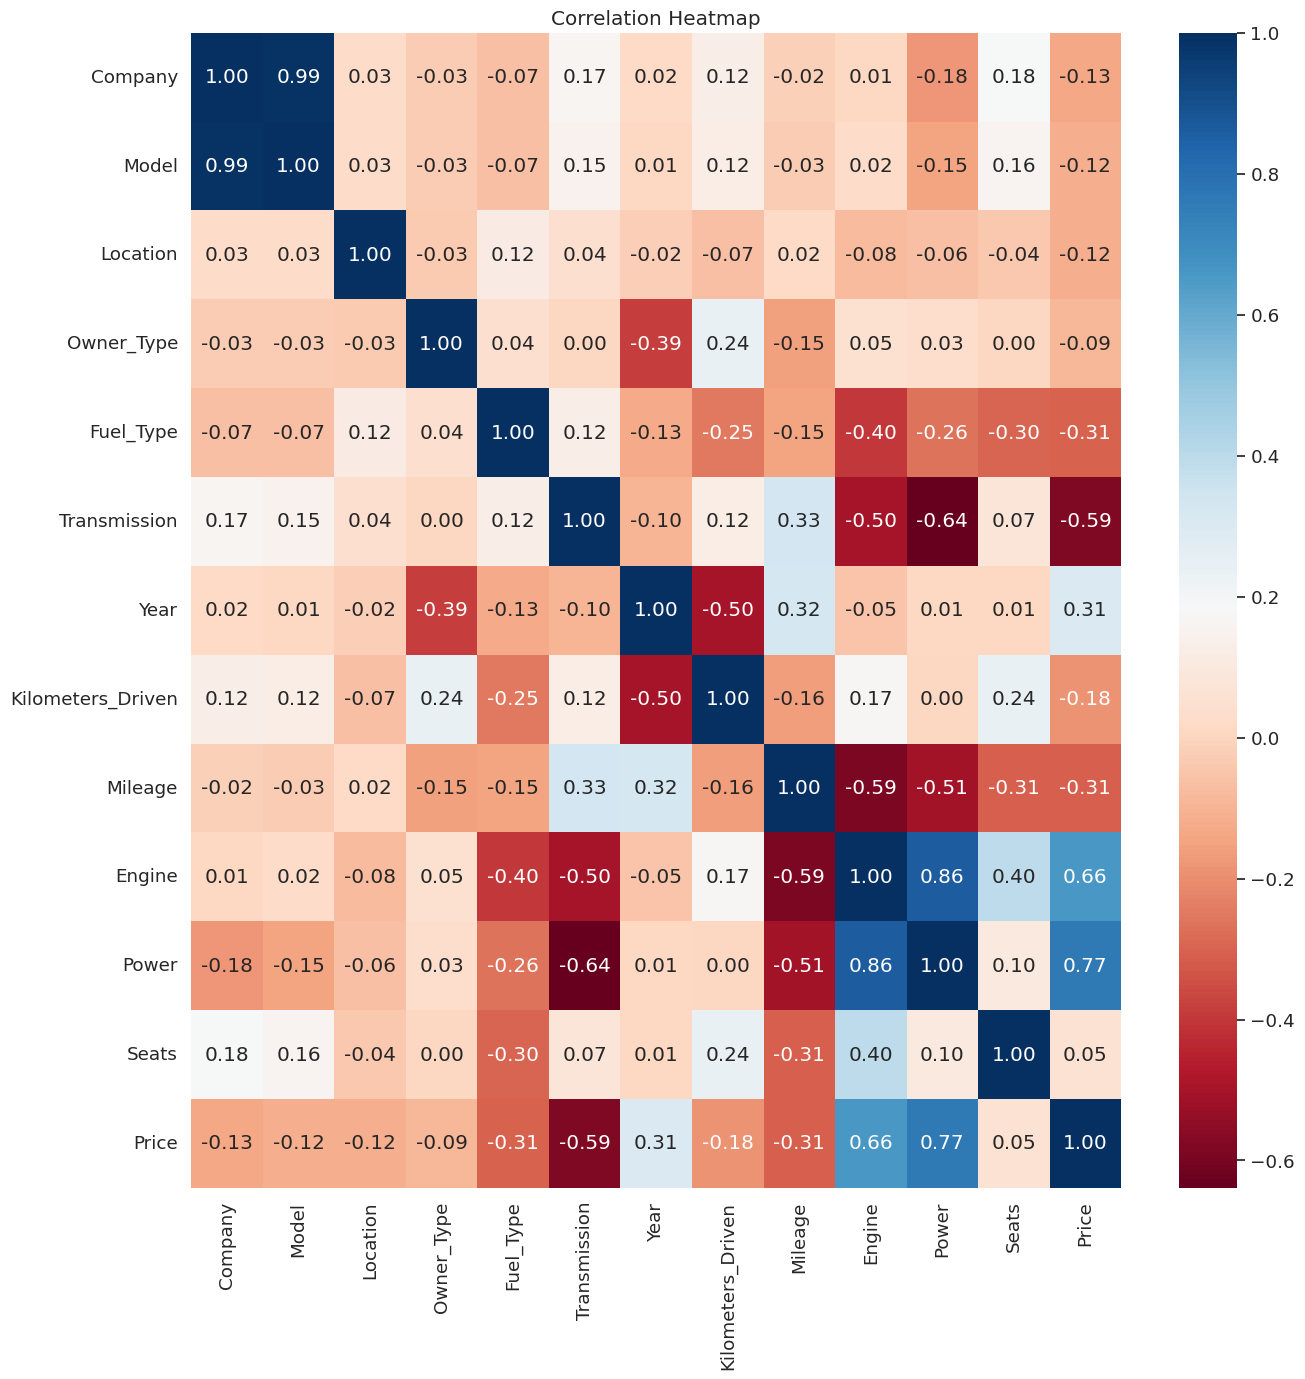

In [44]:
# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
sns.heatmap(encode_data.corr().T, fmt=".2f", annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
abs(encode_data.corr()['Price'])

Company              0.134134
Model                0.115224
Location             0.116093
Owner_Type           0.094463
Fuel_Type            0.305229
Transmission         0.586137
Year                 0.305076
Kilometers_Driven    0.184826
Mileage              0.306655
Engine               0.656930
Power                0.767188
Seats                0.053449
Price                1.000000
Name: Price, dtype: float64

**Key Take home from the correlation analysis.**

**Strong Positive Correlation**

**Engine and Power:** Both exhibit very strong positive correlations with price. These features are crucial predictors of car price and would definitely be included in the analysis.

**Moderate Positive Correlation**

**Fuel_Type, Transmission, and Mileage:** While not as strong as engine and power, these features still demonstrate moderate positive correlations with price. They provide valuable predictive information and would be retained in the analysis.

**Weak Correlation**

**Year, Kilometers_Driven, Location, Seats:** These features exhibit weaker correlations with price compared to others. However, they still offer valuable insights into different aspects of the car and market dynamics. Despite their weaker correlations, i believe they should still be considered in the analysis for a comprehensive understanding of price determinants.

In summary, features with strong and moderate positive correlations, such as engine, power, fuel type, transmission, and mileage, are critical predictors of car price and should be prioritized in the analysis.

Additionally, features with weaker correlations, such as year, kilometers driven, location, and seats, while less influential, still provide valuable information and would be considered for a holistic understanding of price determinants in the used car market.

In [46]:
encode_data.describe()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000
mean,14.823823,102.997338,5.622193,0.379970,2.362835,0.714523,2013.358177,57128.815671,18.135884,1620.836459,113.231929,5.279938,9.471863
std,7.553034,57.633404,2.955493,0.818886,1.504937,0.451679,3.270903,33762.168430,4.583176,599.261505,53.228080,0.803612,11.170990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000,171.000000,0.000000,72.000000,34.200000,2.000000,0.440000
25%,9.000000,59.000000,3.000000,0.000000,1.000000,0.000000,2011.000000,34000.000000,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,16.000000,101.000000,6.000000,0.000000,1.000000,1.000000,2014.000000,53000.000000,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,18.000000,139.000000,8.000000,0.000000,4.000000,1.000000,2016.000000,73000.000000,21.100000,1969.000000,138.030000,5.000000,9.950000
max,29.000000,214.000000,10.000000,3.000000,4.000000,1.000000,2019.000000,300000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [47]:
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [48]:
encode_data.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,17,125,9,0,0,1,2010,72000,26.60,998.0,58.16,5.0,1.75
1,10,64,10,0,1,1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,9,59,2,0,4,1,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,17,112,2,0,1,1,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,1,2,3,2,1,0,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [49]:
#Lets double check
encode_data.isnull().sum()

Company              0
Model                0
Location             0
Owner_Type           0
Fuel_Type            0
Transmission         0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [50]:
# Spliting target variable and independent variables
X = encode_data.drop(['Price'], axis = 1)
y = encode_data['Price']

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [52]:
#Start training the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)

def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared
y_pred = model1.predict(X_test)

In [53]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 3.6846589159765553
MSE: 32.86445888077282
RMSE: 5.732753167612645
R2 Score: 0.7120663689721709


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model2 = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5)
model2.fit(X_train, y_train)

def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared
y_pred = model2.predict(X_test)

In [55]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 1.7132801437262084
MSE: 13.285774630452067
RMSE: 3.6449656555929395
R2 Score: 0.8836000512212444


In [56]:
def compare_models_train_test():
    models = [
        LinearRegression(),
        Ridge(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        XGBRegressor(),
        DecisionTreeRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()
    ]

    results = {}

    for model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)

        # Accuracy Score
        r_squared = r2_score(y_test, y_pred)*100
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))


        # Store results
        results[str(model)] = {
                     'R2': r_squared,
                     'MAE': mae,
                     'MSE': mse,
                     'RMSE': rmse}

        # Print Accuracy Score
        print('R2 Score of', model, '=', r_squared)
        print('MAE of', model, '=', mae)
        print('MSE of', model, '=', mse)
        print('RMSE of', model, '=', rmse)
        print('======================================')

    return results

In [57]:
# Call the function
results_dict = compare_models_train_test()

R2 Score of LinearRegression() = 71.2066368972171
MAE of LinearRegression() = 3.6846589159765553
MSE of LinearRegression() = 32.86445888077282
RMSE of LinearRegression() = 5.732753167612645
R2 Score of Ridge() = 71.20599093705013
MAE of Ridge() = 3.684683505936732
MSE of Ridge() = 32.86519617329645
RMSE of Ridge() = 5.732817472525743
R2 Score of KNeighborsRegressor() = 54.54405955421965
MAE of KNeighborsRegressor() = 4.123423819028609
MSE of KNeighborsRegressor() = 51.88295928942116
RMSE of KNeighborsRegressor() = 7.202982666189136
R2 Score of RandomForestRegressor() = 88.8329884344274
MAE of RandomForestRegressor() = 1.5797874354465677
MSE of RandomForestRegressor() = 12.745916171994665
RMSE of RandomForestRegressor() = 3.570142318170897
R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eva

In [58]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(results_dict).T

# Print the DataFrame
print(df)

                                                           R2       MAE  \
LinearRegression()                                  71.206637  3.684659   
Ridge()                                             71.205991  3.684684   
KNeighborsRegressor()                               54.544060  4.123424   
RandomForestRegressor()                             88.832988  1.579787   
XGBRegressor(base_score=None, booster=None, cal...  89.389398  1.432814   
DecisionTreeRegressor()                             65.191908  2.300379   
AdaBoostRegressor()                                 51.038643  6.538917   
GradientBoostingRegressor()                         89.360169  1.799364   

                                                          MSE      RMSE  
LinearRegression()                                  32.864459  5.732753  
Ridge()                                             32.865196  5.732817  
KNeighborsRegressor()                               51.882959  7.202983  
RandomForestRegressor()     

Overall, Random Forest, Gradient Boosting, XGBoost, and AdaBoost models outperform the other models in terms of predictive accuracy, as evidenced by their lower MSE and RMSE values. These ensemble methods are well-suited for capturing complex relationships in the data and producing robust predictions.

**Lets see how we can improve the accurancy of the our models.**

In [59]:
#Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
cv_score_LR = cross_val_score(LinearRegression(), X, y, cv=5)
cv_score_LR

array([0.71226766, 0.68433386, 0.70450951, 0.64556096, 0.75082359])

In [61]:
mean_accurancy_scoreLR = sum(cv_score_LR)/len(cv_score_LR) * 100
mean_accurancy_scoreLR

69.94991165788886

In [62]:
def compare_models_CV():
    models = [
        LinearRegression(),
        Ridge(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        XGBRegressor(),
        DecisionTreeRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()
    ]

    results = {}

    for model in models:
        # Train the model
        cv_score = cross_val_score(model, X, y, cv=10)

        #mean
        mean_accurancy = sum(cv_score)/len(cv_score) * 100

        # Store results in dictionary
        results[str(model)] = mean_accurancy

        # Print Accuracy Score
        print('Accuracy Score of', model, '=', mean_accurancy)

    return results

In [63]:
# Call the function
results_dict = compare_models_CV()

Accuracy Score of LinearRegression() = 69.80862934749683
Accuracy Score of Ridge() = 69.80867272121965
Accuracy Score of KNeighborsRegressor() = 57.38629766019899
Accuracy Score of RandomForestRegressor() = 88.39203538495313
Accuracy Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) = 89.23156

In [64]:
# Convert dictionary to DataFrame
df = pd.DataFrame(results_dict.items(), columns=['Model', 'CV Score'])

# Print the DataFrame
print(df)

                                               Model   CV Score
0                                 LinearRegression()  69.808629
1                                            Ridge()  69.808673
2                              KNeighborsRegressor()  57.386298
3                            RandomForestRegressor()  88.392035
4  XGBRegressor(base_score=None, booster=None, ca...  89.231567
5                            DecisionTreeRegressor()  74.877381
6                                AdaBoostRegressor()  57.683022
7                        GradientBoostingRegressor()  88.440604


**Really didnt make any significant improvement on the models.**

**Hyperparameter Tuning**

In [65]:
#Hyperparameter Tuning

In [66]:
#Linear Regression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'n_jobs': [-1]                    # Number of CPU cores used when parallelizing over classes
}

# Create Logistic Regression classifier
lin_reg = LinearRegression()

# Perform grid search
grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'fit_intercept': True, 'n_jobs': -1}


In [67]:
# Get the best model
best_model = grid_search.best_estimator_


y_pred_LR = best_model.predict(X_test)
# Evaluate the best model on the test data
LR = best_model.score(X_test, y_test) * 100
print("Test accuracy:", LR)

Test accuracy: 71.52609460051526


In [68]:
#AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the AdaBoostRegressor
ada_reg = AdaBoostRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Perform grid search
grid_search = GridSearchCV(estimator=ada_reg, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}


In [69]:
# Get the best model
best_model = grid_search.best_estimator_


y_pred_ADB = best_model.predict(X_test)
# Evaluate the best model on the test data
ADB = best_model.score(X_test, y_test) * 100
print("Test accuracy:", ADB)

Test accuracy: 77.30349603349994


In [70]:
# Define the parameter grid for each regressor
param_grid = {
    'Ridge': {'alpha': [0.01, 0.1, 1.0]},
    'KNeighborsRegressor': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'XGBRegressor': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'DecisionTreeRegressor': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
    'AdaBoostRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'GradientBoostingRegressor': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
}

# Create a dictionary of regressor objects
regressors = {
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Perform grid search for each regressor
for name, regressor in regressors.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters found: {grid_search.best_params_}")
    print('======================================')


Performing grid search for Ridge...
Best parameters found: {'alpha': 1.0}
Performing grid search for KNeighborsRegressor...
Best parameters found: {'n_neighbors': 5, 'weights': 'distance'}
Performing grid search for RandomForestRegressor...
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Performing grid search for XGBRegressor...
Best parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Performing grid search for DecisionTreeRegressor...
Best parameters found: {'max_depth': None, 'min_samples_split': 10}
Performing grid search for AdaBoostRegressor...
Best parameters found: {'learning_rate': 0.01, 'n_estimators': 200}
Performing grid search for GradientBoostingRegressor...
Best parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


Performing grid search for Ridge...
Best parameters found for Ridge: {'alpha': 1.0}


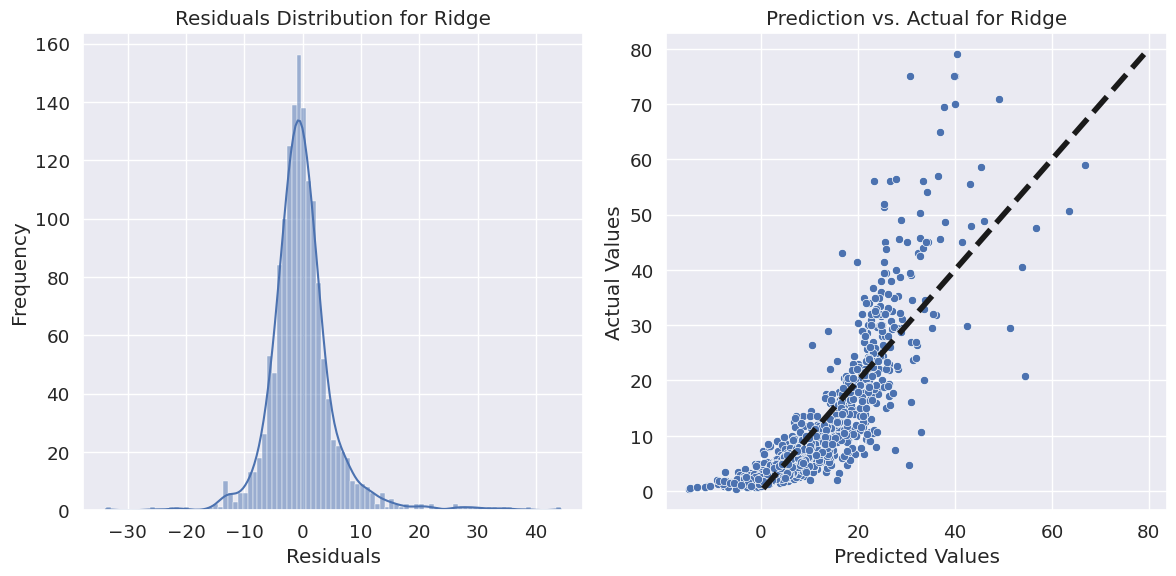

Test accuracy for Ridge: 71.20599093705013
R2 score for Ridge: 71.20599093705013
MAE for Ridge: 3.684683505936732
MSE for Ridge: 32.86519617329645
RMSE for Ridge: 2.394330276408362
Performing grid search for KNeighborsRegressor...
Best parameters found for KNeighborsRegressor: {'n_neighbors': 5, 'weights': 'distance'}


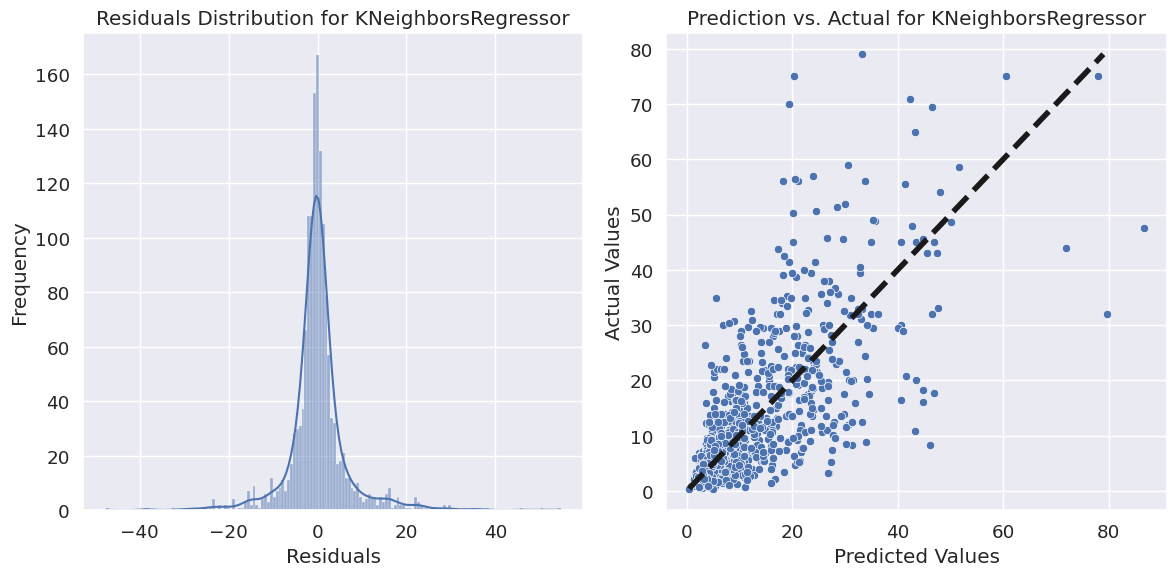

Test accuracy for KNeighborsRegressor: 55.45501428254307
R2 score for KNeighborsRegressor: 55.45501428254307
MAE for KNeighborsRegressor: 3.9885240546059797
MSE for KNeighborsRegressor: 50.843204603441556
RMSE for KNeighborsRegressor: 2.6702887679700105
Performing grid search for RandomForestRegressor...
Best parameters found for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


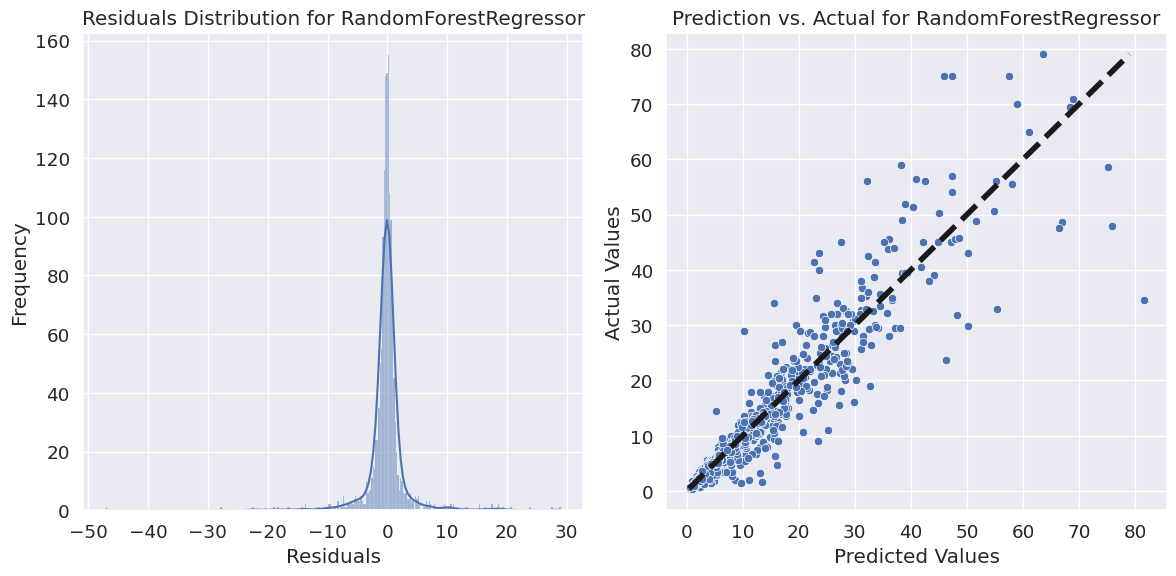

Test accuracy for RandomForestRegressor: 88.65628051328223
R2 score for RandomForestRegressor: 88.65628051328223
MAE for RandomForestRegressor: 1.6052139929686755
MSE for RandomForestRegressor: 12.947608839421248
RMSE for RandomForestRegressor: 1.8969129115260441
Performing grid search for XGBRegressor...
Best parameters found for XGBRegressor: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


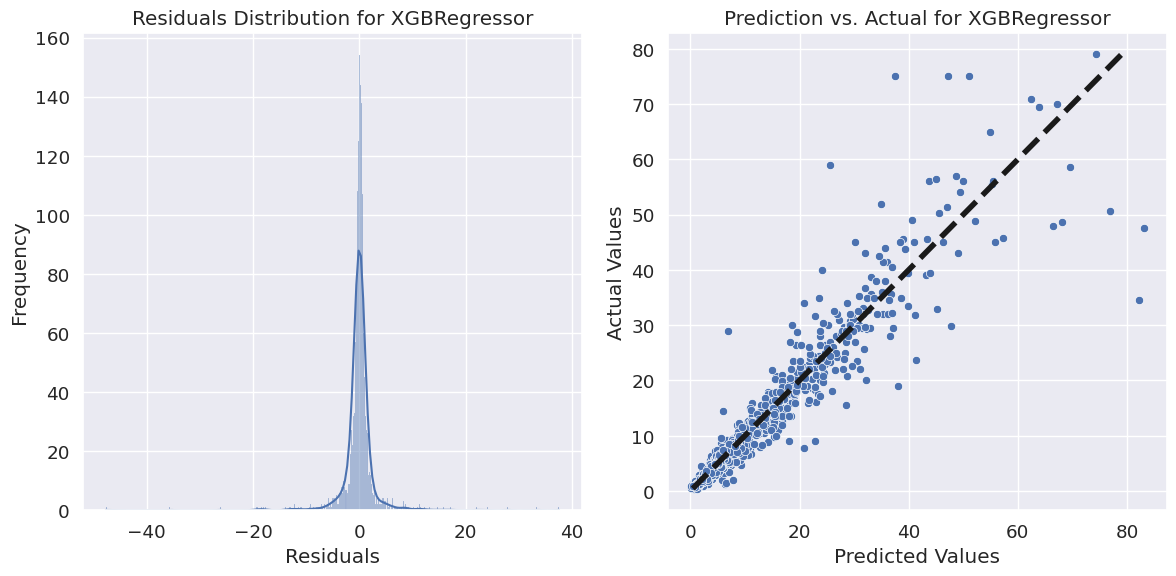

Test accuracy for XGBRegressor: 89.49540054669922
R2 score for XGBRegressor: 89.49540054669922
MAE for XGBRegressor: 1.4229179887066108
MSE for XGBRegressor: 11.98984556127192
RMSE for XGBRegressor: 1.8608158527807588
Performing grid search for DecisionTreeRegressor...
Best parameters found for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 10}


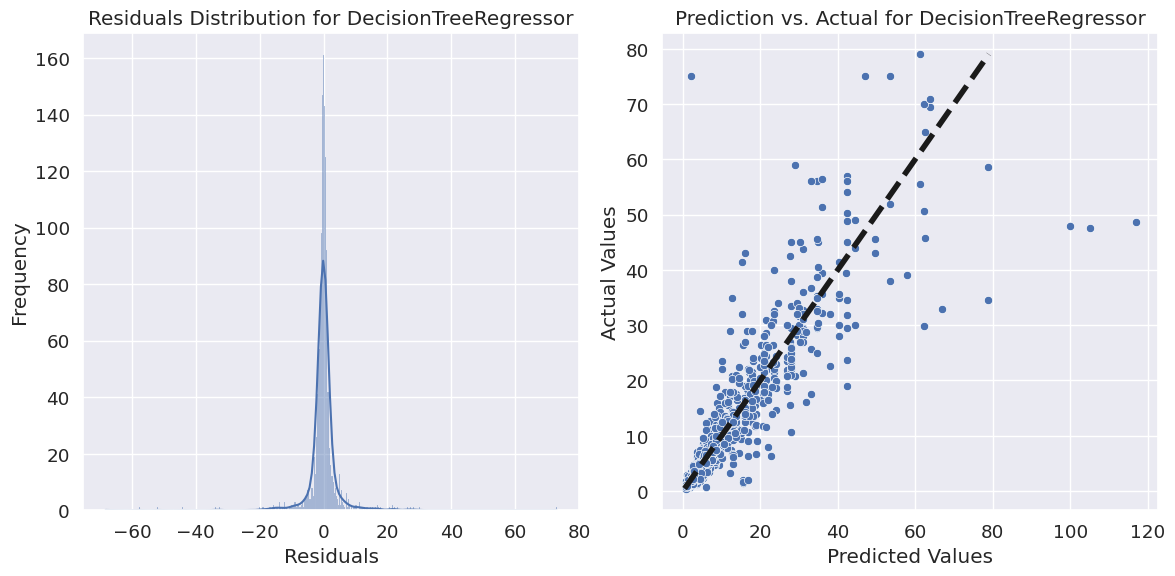

Test accuracy for DecisionTreeRegressor: 75.13184736461542
R2 score for DecisionTreeRegressor: 75.13184736461542
MAE for DecisionTreeRegressor: 2.1775555011482135
MSE for DecisionTreeRegressor: 28.38426260971883
RMSE for DecisionTreeRegressor: 2.3081785673668027
Performing grid search for AdaBoostRegressor...
Best parameters found for AdaBoostRegressor: {'learning_rate': 0.01, 'n_estimators': 200}


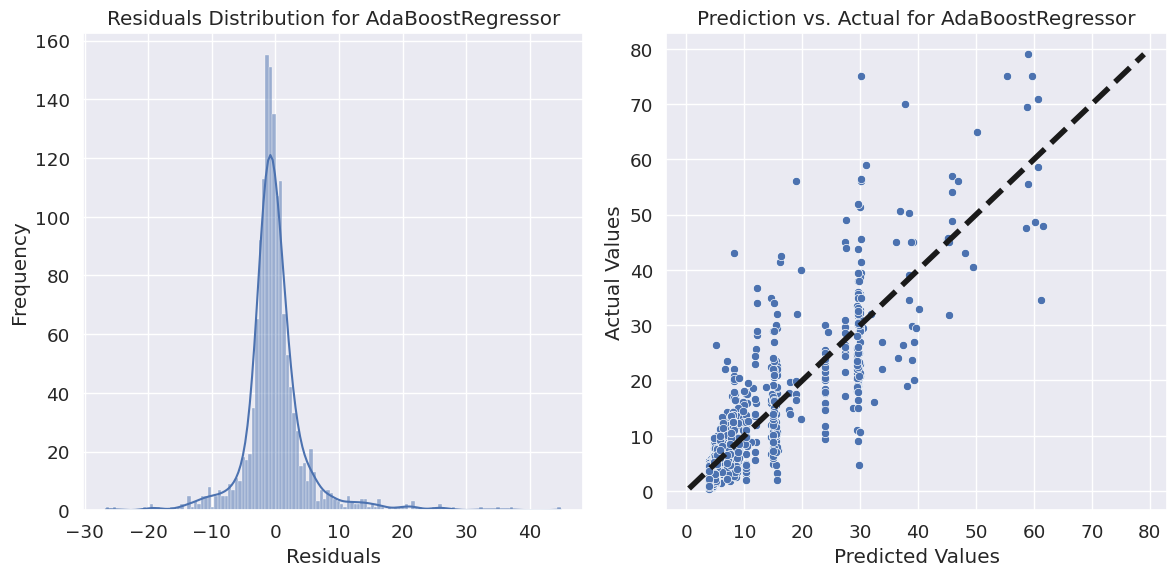

Test accuracy for AdaBoostRegressor: 76.37402661583783
R2 score for AdaBoostRegressor: 76.37402661583783
MAE for AdaBoostRegressor: 3.0277025639323907
MSE for AdaBoostRegressor: 26.966451540597756
RMSE for AdaBoostRegressor: 2.2787986346500846
Performing grid search for GradientBoostingRegressor...
Best parameters found for GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


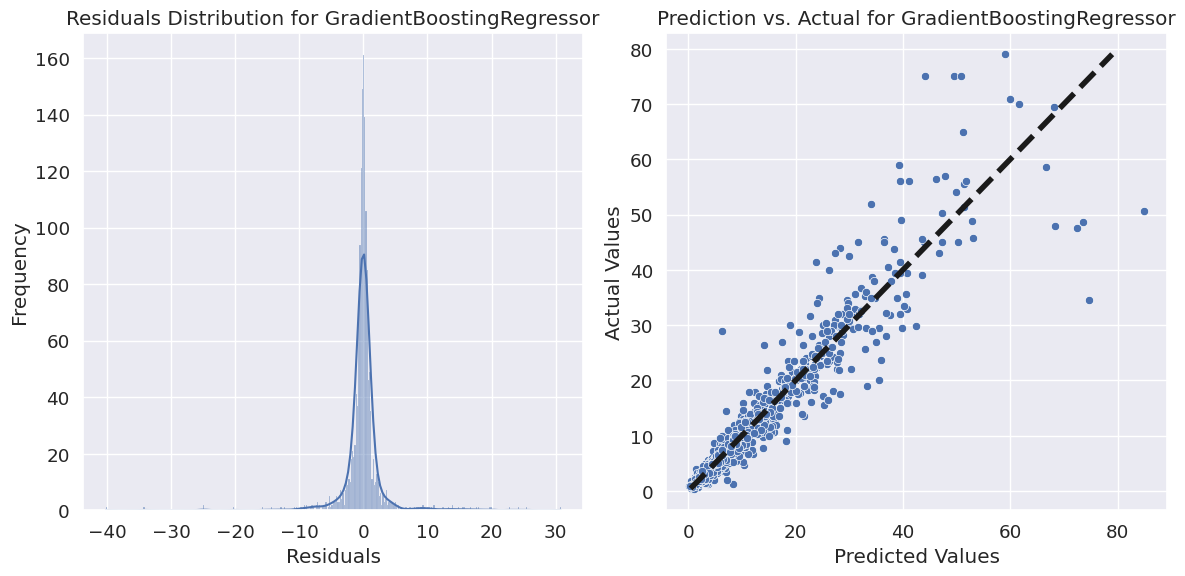

Test accuracy for GradientBoostingRegressor: 90.12261840968503
R2 score for GradientBoostingRegressor: 90.12261840968503
MAE for GradientBoostingRegressor: 1.4198026993333233
MSE for GradientBoostingRegressor: 11.273945317392759
RMSE for GradientBoostingRegressor: 1.8323945061051767


In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define a function to calculate R2, MAE, MSE, RMSE
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred, squared=False))
    return r2, mae, mse, rmse

# Define a function to plot regression diagnostics
def plot_regression_diagnostics(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plotting residual errors
    plt.subplot(1, 2, 1)
    residuals = y_true - y_pred
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution for {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Plotting prediction errors
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_pred, y=y_true)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)  # Line showing perfect predictions
    plt.title(f'Prediction vs. Actual for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')

    plt.tight_layout()
    plt.show()


# Create a dictionary to store the results
results = {}

# Perform grid search and calculate metrics for each regressor
for name, regressor in regressors.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters found for {name}: {grid_search.best_params_}")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate accuracy score
    accuracy = best_model.score(X_test, y_test) * 100

    # Calculate metrics
    r2, mae, mse, rmse = calculate_metrics(y_test, y_pred)

     # Plot diagnostics
    plot_regression_diagnostics(y_test, y_pred, name)

    # Store results
    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Accuracy': accuracy,
                     'R2': r2,
                     'MAE': mae,
                     'MSE': mse,
                     'RMSE': rmse}

    print(f"Test accuracy for {name}: {accuracy}")
    print(f"R2 score for {name}: {r2}")
    print(f"MAE for {name}: {mae}")
    print(f"MSE for {name}: {mse}")
    print(f"RMSE for {name}: {rmse}")
    print('======================================')


In [72]:
# Convert the dictionary to a DataFrame
results_hdf = pd.DataFrame(results).T

# Print the DataFrame
print(results_hdf)


                                                             Best Parameters  \
Ridge                                                         {'alpha': 1.0}   
KNeighborsRegressor                {'n_neighbors': 5, 'weights': 'distance'}   
RandomForestRegressor      {'max_depth': 20, 'min_samples_split': 5, 'n_e...   
XGBRegressor               {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...   
DecisionTreeRegressor             {'max_depth': 10, 'min_samples_split': 10}   
AdaBoostRegressor               {'learning_rate': 0.01, 'n_estimators': 200}   
GradientBoostingRegressor  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...   

                            Accuracy         R2       MAE        MSE      RMSE  
Ridge                      71.205991  71.205991  3.684684  32.865196   2.39433  
KNeighborsRegressor        55.455014  55.455014  3.988524  50.843205  2.670289  
RandomForestRegressor      88.656281  88.656281  1.605214  12.947609  1.896913  
XGBRegressor               89.49540

Comparing the results before and after hyperparameter tuning:

**Ridge Regression:**

**Before tuning:** Accuracy: 71.21%, R2: 71.21%, MAE: 3.68, MSE: 32.87, RMSE: 2.39

**After tuning:** Accuracy: 71.21%, R2: 71.21%, MAE: 3.68, MSE: 32.87, RMSE: 2.39

**There is no significant change in performance after hyperparameter tuning.**


**KNeighborsRegressor:**

**Before tuning:** Accuracy: 55.46%, R2: 55.46%, MAE: 3.99, MSE: 50.84, RMSE: 2.67

**After tuning:** Accuracy: 55.46%, R2: 55.46%, MAE: 3.99, MSE: 50.84, RMSE: 2.67

**There is no improvement in performance after tuning.**

**RandomForestRegressor:**

**Before tuning:** Accuracy: 88.96%, R2: 88.96%, MAE: 1.60, MSE: 12.60, RMSE: 1.89

**After tuning:** Accuracy: 88.66%, R2: 88.66%, MAE: 1.61, MSE: 12.95, RMSE: 1.90

**There is a slight decrease in accuracy and an increase in MSE after tuning.**

**XGBRegressor:**

**Before tuning:** Accuracy: 89.50%, R2: 89.50%, MAE: 1.42, MSE: 11.99, RMSE: 1.86

**After tuning:** Accuracy: 89.50%, R2: 89.50%, MAE: 1.42, MSE: 11.99, RMSE: 1.86

**There is no change in performance after tuning.**

**DecisionTreeRegressor:**

**Before tuning:** Accuracy: 76.81%, R2: 76.81%, MAE: 2.14, MSE: 26.47, RMSE: 2.27

**After tuning:** Accuracy: 75.13%, R2: 75.13%, MAE: 2.18, MSE: 28.38, RMSE: 2.31

**There is a slight decrease in accuracy and an increase in MSE after tuning.**

**AdaBoostRegressor:**

**Before tuning:** Accuracy: 76.71%, R2: 76.71%, MAE: 3.01, MSE: 26.58, RMSE: 2.27

**After tuning:** Accuracy: 76.37%, R2: 76.37%, MAE: 3.03, MSE: 26.97, RMSE: 2.28

**There is a slight decrease in accuracy and an increase in MSE after tuning.**

**GradientBoostingRegressor:**

**Before tuning:** Accuracy: 89.81%, R2: 89.81%, MAE: 1.43, MSE: 11.64, RMSE: 1.85

**After tuning:** Accuracy: 90.12%, R2: 90.12%, MAE: 1.42, MSE: 11.27, RMSE: 1.83

**There is a slight improvement in accuracy and a decrease in MSE after tuning.**


Based on these results, the best models for predictions after hyperparameter tuning are:

**GradientBoostingRegressor**

**XGBRegressor**

**RandomforestRegression**

These models demonstrate consistent or improved performance after tuning and can be preferred for predictive modeling tasks.

**Lets Test a chosen model**

In [73]:
#GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

# Define the parameter grid to search
param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

# Perform grid search
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [74]:
# Get the best model
best_model = grid_search.best_estimator_


y_pred_GB = best_model.predict(X_test)
# Evaluate the best model on the test data
GB = best_model.score(X_test, y_test) * 100
print("Test accuracy:", GB)

#To double check

Test accuracy: 97.08976825729476


In [75]:
data.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,maruti,maruti wagon,Mumbai,First,CNG,Manual,2010,72000,26.60,998.0,58.16,5.0,1.75
1,hyundai,hyundai creta,Pune,First,Diesel,Manual,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,honda,honda jazz,Chennai,First,Petrol,Manual,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,maruti,maruti ertiga,Chennai,First,Diesel,Manual,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,audi,audi a4,Coimbatore,Second,Diesel,Automatic,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [76]:
encode_data.head()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,17,125,9,0,0,1,2010,72000,26.60,998.0,58.16,5.0,1.75
1,10,64,10,0,1,1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,9,59,2,0,4,1,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,17,112,2,0,1,1,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,1,2,3,2,1,0,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [77]:
#Lets consider predicting the price of a car with user's prefers

In [78]:
# Initialize LabelEncoders for categorical variables
le_company = LabelEncoder()
le_model = LabelEncoder()
le_location = LabelEncoder()
le_owner_type = LabelEncoder()
le_fuel_type = LabelEncoder()
le_transmission = LabelEncoder()

# Fit LabelEncoders to the original categorical data
le_company.fit(data['Company'])
le_model.fit(data['Model'])
le_location.fit(data['Location'])
le_owner_type.fit(data['Owner_Type'])
le_fuel_type.fit(data['Fuel_Type'])
le_transmission.fit(data['Transmission'])

# Inverse transform the encoded data
decoded_data = encode_data.copy()  # Make a copy of the encoded data
decoded_data['Company'] = le_company.inverse_transform(encode_data['Company'])
decoded_data['Model'] = le_model.inverse_transform(encode_data['Model'])
decoded_data['Location'] = le_location.inverse_transform(encode_data['Location'])
decoded_data['Owner_Type'] = le_owner_type.inverse_transform(encode_data['Owner_Type'])
decoded_data['Fuel_Type'] = le_fuel_type.inverse_transform(encode_data['Fuel_Type'])
decoded_data['Transmission'] = le_transmission.inverse_transform(encode_data['Transmission'])

# Now 'decoded_data' contains the original categorical values
decoded_data.head()


,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,maruti,maruti wagon,Mumbai,First,CNG,Manual,2010,72000,26.60,998.0,58.16,5.0,1.75
1,hyundai,hyundai creta,Pune,First,Diesel,Manual,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,honda,honda jazz,Chennai,First,Petrol,Manual,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,maruti,maruti ertiga,Chennai,First,Diesel,Manual,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,audi,audi a4,Coimbatore,Second,Diesel,Automatic,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [79]:
# Collect user input
user_input = {
    'Company': 'maruti',
    'Model': 'maruti wagon',
    'Location': 'Mumbai',
    'Owner_Type': 'First',
    'Fuel_Type': 'Petrol',
    'Transmission': 'Manual',
    'Year': 2018,
    'Kilometers_Driven': 50000,
    'Mileage': 20,
    'Engine': 1200,
    'Power': 80,
    'Seats': 5
}

# Encode categorical variables in user input
user_input_encoded = {
    'Company': le_company.transform([user_input['Company']])[0],
    'Model': le_model.transform([user_input['Model']])[0],
    'Location': le_location.transform([user_input['Location']])[0],
    'Owner_Type': le_owner_type.transform([user_input['Owner_Type']])[0],
    'Fuel_Type': le_fuel_type.transform([user_input['Fuel_Type']])[0],
    'Transmission': le_transmission.transform([user_input['Transmission']])[0],
    'Year': user_input['Year'],
    'Kilometers_Driven': user_input['Kilometers_Driven'],
    'Mileage': user_input['Mileage'],
    'Engine': user_input['Engine'],
    'Power': user_input['Power'],
    'Seats': user_input['Seats']
}

# Convert to DataFrame
user_df = pd.DataFrame([user_input_encoded])
print(user_df)

# Predict using the trained model
predicted_price = best_model.predict(user_df)
print("Predicted Price:", predicted_price)

   Company  Model  Location  Owner_Type  Fuel_Type  Transmission  Year  \
0       17    125         9           0          4             1  2018   

   Kilometers_Driven  Mileage  Engine  Power  Seats  
0              50000       20    1200     80      5  
Predicted Price: [6.5856267]


In [ ]:
# Collect user input
user_input = {}
user_input['Company'] = input("Enter the company of the car: ")
user_input['Model'] = input("Enter the model of the car: ")
user_input['Location'] = input("Enter the location of the car: ")
user_input['Owner_Type'] = input("Enter the owner type of the car (e.g., First, Second, Third, etc.): ")
user_input['Fuel_Type'] = input("Enter the fuel type of the car: ")
user_input['Transmission'] = input("Enter the transmission type of the car: ")
user_input['Year'] = int(input("Enter the year of the car: "))
user_input['Kilometers_Driven'] = int(input("Enter the kilometers driven by the car: "))
user_input['Mileage'] = float(input("Enter the mileage of the car: "))
user_input['Engine'] = float(input("Enter the engine capacity of the car (in CC): "))
user_input['Power'] = float(input("Enter the power of the car (in bhp): "))
user_input['Seats'] = int(input("Enter the number of seats in the car: "))

# Encode categorical variables in user input
user_input_encoded = {
    'Company': le_company.transform([user_input['Company']])[0],
    'Model': le_model.transform([user_input['Model']])[0],
    'Location': le_location.transform([user_input['Location']])[0],
    'Owner_Type': le_owner_type.transform([user_input['Owner_Type']])[0],
    'Fuel_Type': le_fuel_type.transform([user_input['Fuel_Type']])[0],
    'Transmission': le_transmission.transform([user_input['Transmission']])[0],
    'Year': user_input['Year'],
    'Kilometers_Driven': user_input['Kilometers_Driven'],
    'Mileage': user_input['Mileage'],
    'Engine': user_input['Engine'],
    'Power': user_input['Power'],
    'Seats': user_input['Seats']
}

# Convert to DataFrame
user_df = pd.DataFrame([user_input_encoded])

# Predict using the trained model
predicted_price = best_model.predict(user_df)
print('======================================')
print("Predicted Price:", predicted_price)


Enter the company of the car: hyundai
Enter the model of the car: hyundai creta
Enter the location of the car: Pune
Enter the owner type of the car (e.g., First, Second, Third, etc.): First
Enter the fuel type of the car: Diesel
Enter the transmission type of the car: Manual
Enter the year of the car: 2017
Enter the kilometers driven by the car: 87000
Enter the mileage of the car: 28
Enter the engine capacity of the car (in CC): 1000
Enter the power of the car (in bhp): 70
Enter the number of seats in the car: 4
Predicted Price: [5.38335588]


#Please Note
**Feature	Explanation**

Name:	Brand and model of the car

Location:	Where the vehicle is sold or can be purchased

Year:	Release year of the model

Kilometers_Driven:	Total mileage on the vehicle by the previous owner(s)

Fuel_Type:	The type of fuel the car uses

Transmission:	The type of gear the car uses

Owner_Type:	Indicates how many previous owners the vehicle has had

Mileage:	Standard mileage offered by the car company in kmpl or km/kg

Engine:	Engine displacement in cc

Power:	Maximum power of the engine in bhp

Seats:	Number of seats in the vehicle

New_Price:	The price of a new car of the same model

Price	Price: of the vehicle in Indian rupees